req         WARNING 	DEFAULT CACHE ENABLED! (93.87 MB) C:\Users\Nayan Bisht\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.2.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api   

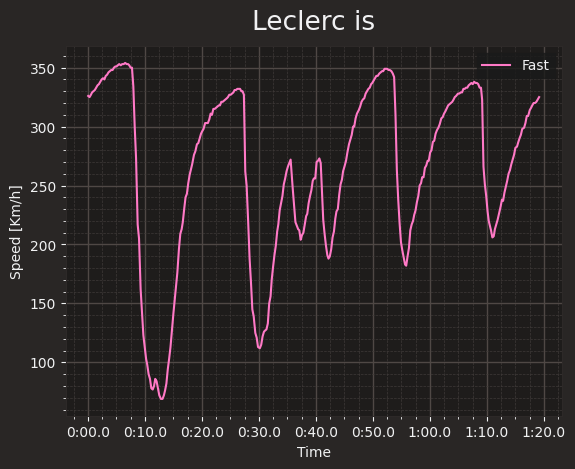

In [1]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting
fastf1.plotting.setup_mpl()

session = fastf1.get_session(2019, 'Monza', 'Q')

session.load()
fast_leclerc = session.laps.pick_driver('LEC').pick_fastest()
lec_car_data = fast_leclerc.get_car_data()
t = lec_car_data['Time']
vCar = lec_car_data['Speed']

# The rest is just plotting
fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.2.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No 

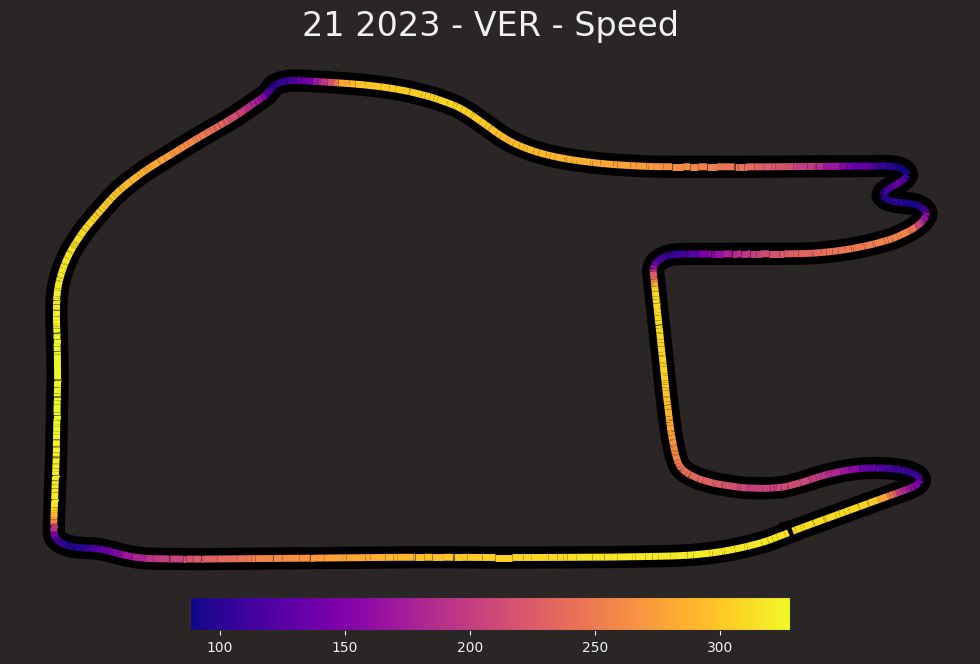

In [5]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import fastf1 as ff1


##############################################################################
# First, we define some variables that allow us to conveniently control what
# we want to plot.
year = 2023
ses = 'R'
driver = 'VER'
colormap = mpl.cm.plasma


##############################################################################
# Next, we load the session and select the desired data.
session = ff1.get_session(year, 'LAS VEGAS', ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on


##############################################################################
# Now, we create a set of line segments so that we can color them
# individually. This creates the points as a N x 1 x 2 array so that we can
# stack points  together easily to get the segments. The segments array for
# line collection needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


##############################################################################
# After this, we can actually plot the data.

# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")


# Show the plot
plt.show()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.2.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WA

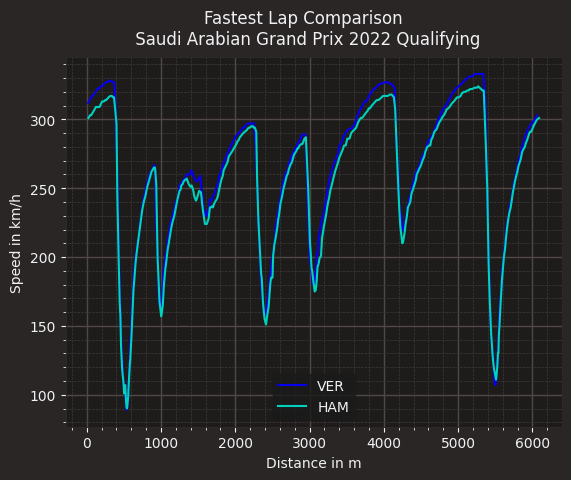

In [7]:
"""Overlaying speed traces of two laps
======================================

Compare two fastest laps by overlaying their speed traces.
"""


import matplotlib.pyplot as plt

import fastf1.plotting


# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

# load a session and its telemetry data
session = fastf1.get_session(2022, 'Jeddah', 'Q')
session.load()

##############################################################################
# First, we select the two laps that we want to compare

ver_lap = session.laps.pick_driver('VER').pick_fastest()
ham_lap = session.laps.pick_driver('HAM').pick_fastest()

##############################################################################
# Next we get the telemetry data for each lap. We also add a 'Distance' column
# to the telemetry dataframe as this makes it easier to compare the laps.

ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

##############################################################################
# Finally, we create a plot and plot both speed traces.
# We color the individual lines with the driver's team colors.

rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')

fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='HAM')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.2.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver 16: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '3', '10', '55', '16', '11', '99', '5', '18', '14', '31', '63', '6', '22', '47', '88', '9']
c:\Users\Nayan Bisht\AppData\Lo

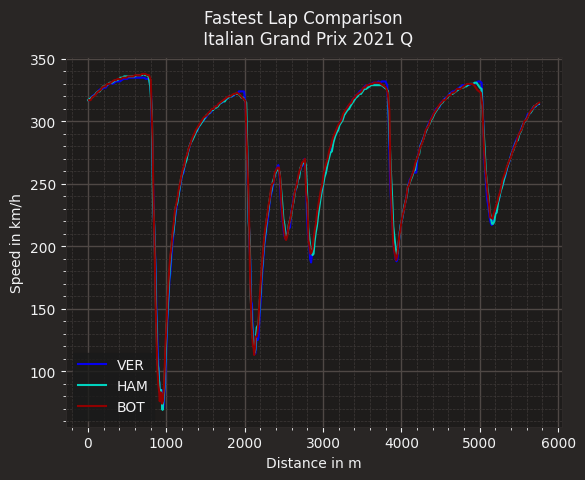

In [9]:
import fastf1 as ff1
import matplotlib.pyplot as plt

def compare_drivers(season, race, session_type, driver_names):
    # Load the session data
    session = ff1.get_session(season, race, session_type)
    session.load()

    # Plotting
    fig, ax = plt.subplots()

    for driver_name in driver_names:
        # Retrieve Fastest Lap for each driver
        driver_lap = session.laps.pick_driver(driver_name).pick_fastest()

        # Get Telemetry Data
        driver_tel = driver_lap.get_car_data().add_distance()

        # Plot each driver's speed trace
        color = ff1.plotting.driver_color(driver_name)
        ax.plot(driver_tel['Distance'], driver_tel['Speed'], label=driver_name, color=color)

    ax.set_xlabel('Distance in m')
    ax.set_ylabel('Speed in km/h')

    ax.legend()
    plt.suptitle(f"Fastest Lap Comparison \n "
                 f"{session.event['EventName']} {session.event.year} {session_type}")

    plt.show()

# Example usage:
season_input = 2021
race_input = 'monza'
session_type_input = 'Q'
drivers_input = ['VER', 'HAM', 'BOT']  # Add more drivers as needed

compare_drivers(season_input, race_input, session_type_input, drivers_input)
